In [2]:
import numpy as np 
import pandas as pd 
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 
import itertools
import tensorflow as tf
from mpl_toolkits.mplot3d import Axes3D
import pdb 
%matplotlib notebook 

In [3]:
designMatrix=pd.read_csv('./designMatrix.csv')

In [4]:
X=designMatrix[['departure', 'timestamp']].values
supply=designMatrix['supply'].values
demand=designMatrix['demand'].values

In [5]:
print 'X.shape={}, supply.shape={}, demand.shape={}'.format(X.shape, supply.shape, demand.shape)
regions, timeslots = np.arange(1,66+1), np.arange(1,144+1)
numregions, numtimeslots = len(regions), len(timeslots)

X.shape=(9314, 2), supply.shape=(9314,), demand.shape=(9314,)


<IPython.core.display.Javascript object>


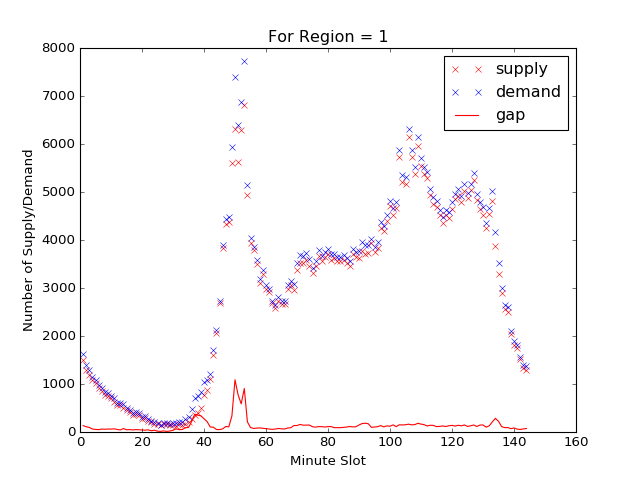

<IPython.core.display.Javascript object>


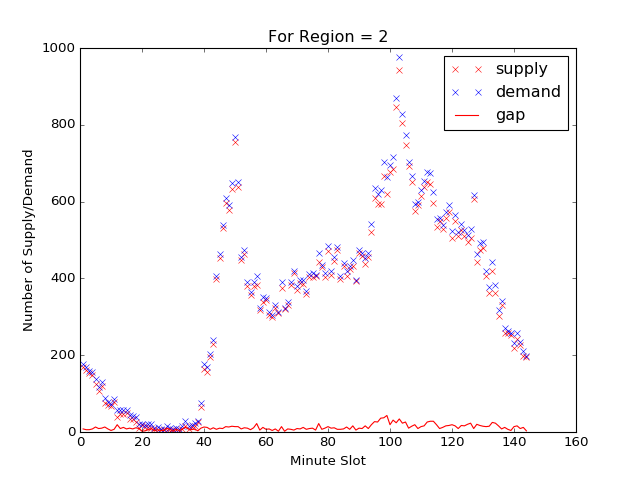

<IPython.core.display.Javascript object>


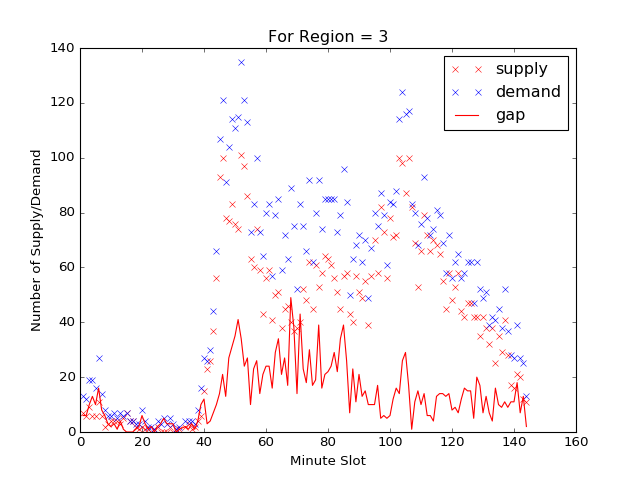

<IPython.core.display.Javascript object>


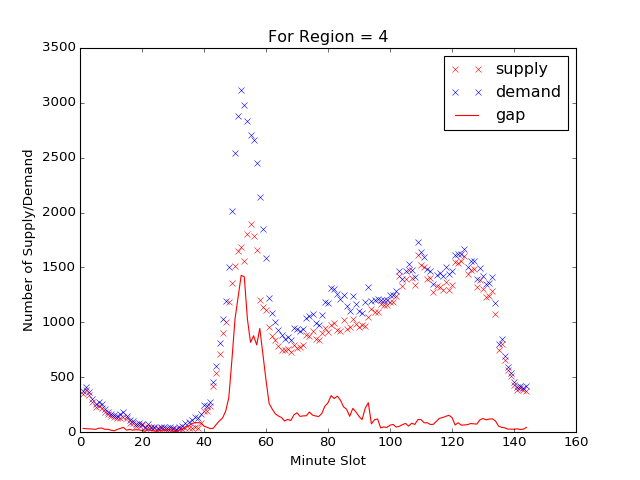

<IPython.core.display.Javascript object>


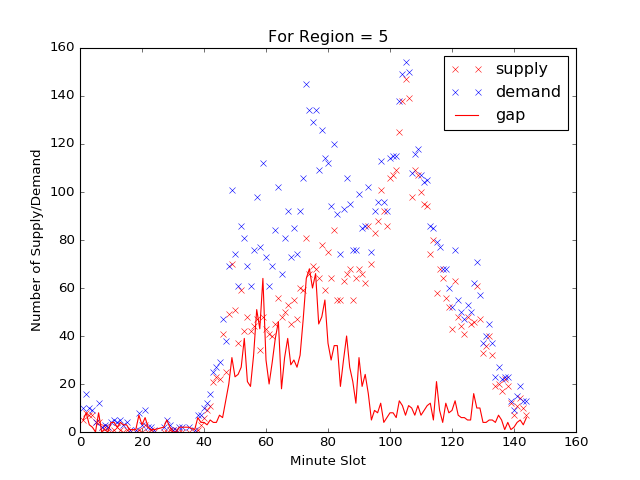

<IPython.core.display.Javascript object>


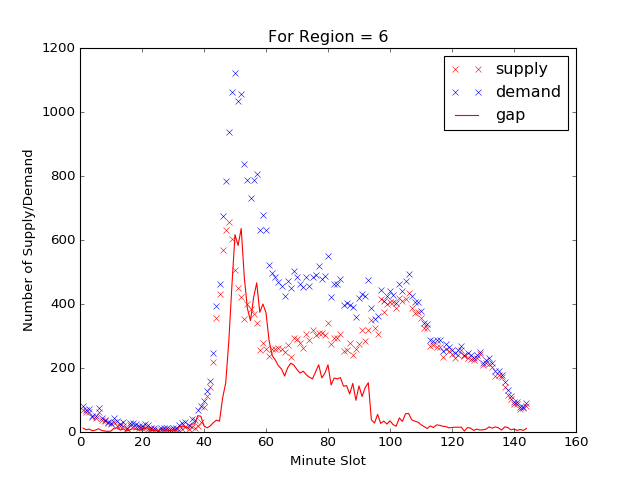

<IPython.core.display.Javascript object>


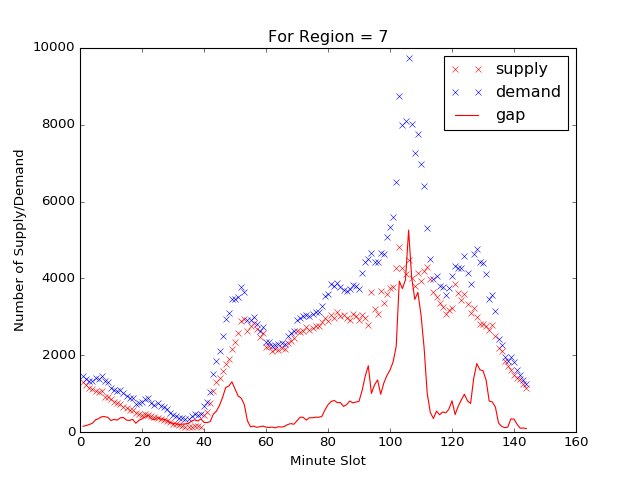

<IPython.core.display.Javascript object>


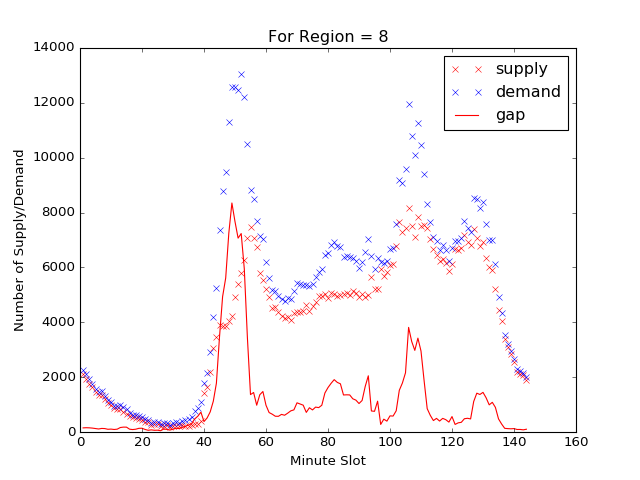

<IPython.core.display.Javascript object>


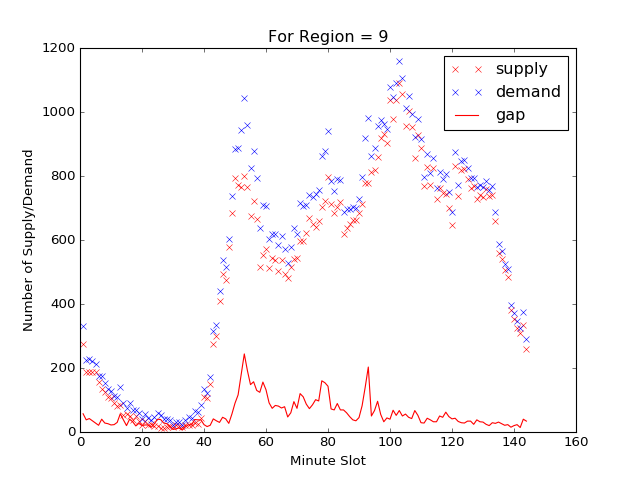

<IPython.core.display.Javascript object>


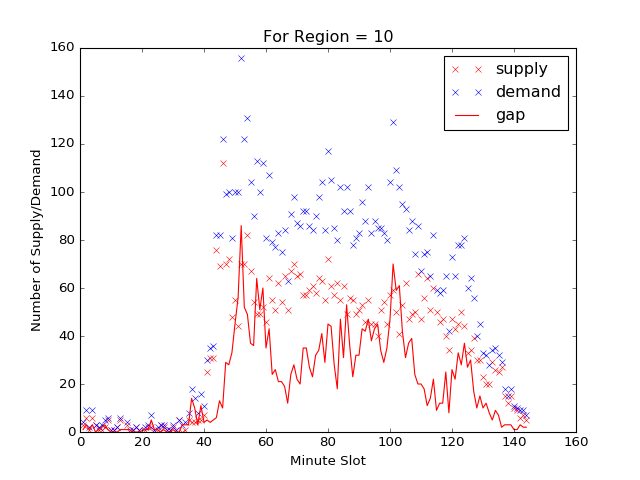

<IPython.core.display.Javascript object>


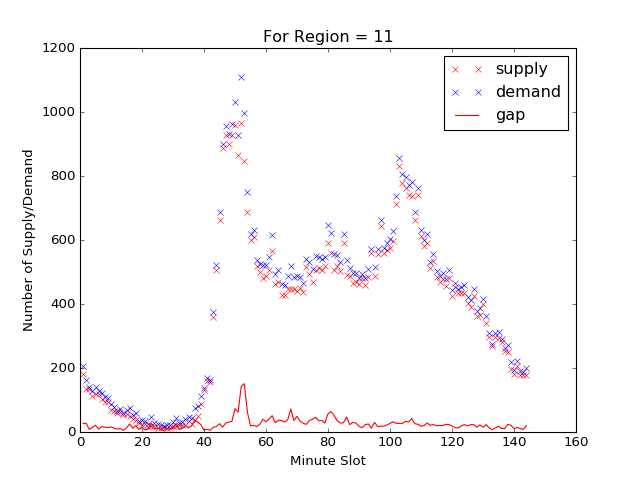

<IPython.core.display.Javascript object>


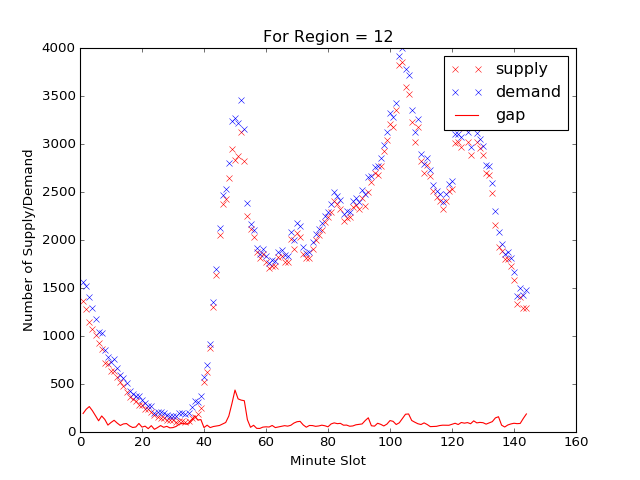

<IPython.core.display.Javascript object>


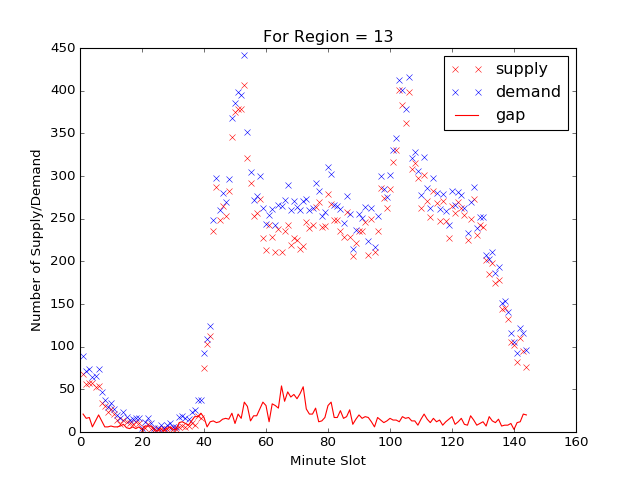

<IPython.core.display.Javascript object>


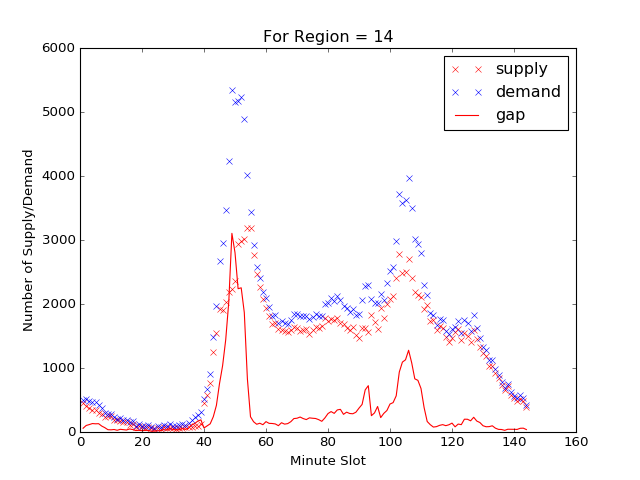

<IPython.core.display.Javascript object>


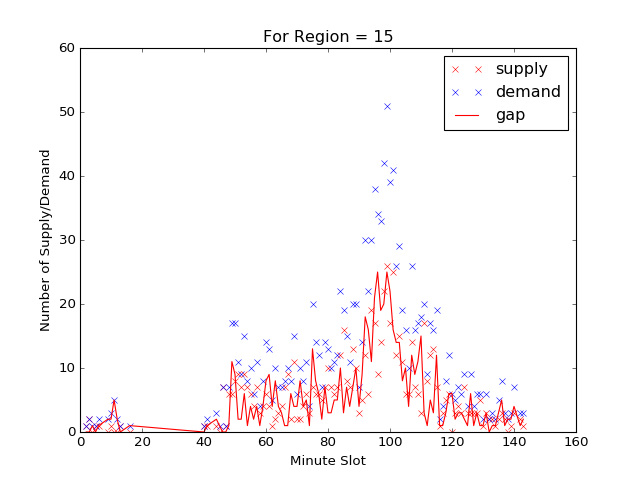

<IPython.core.display.Javascript object>


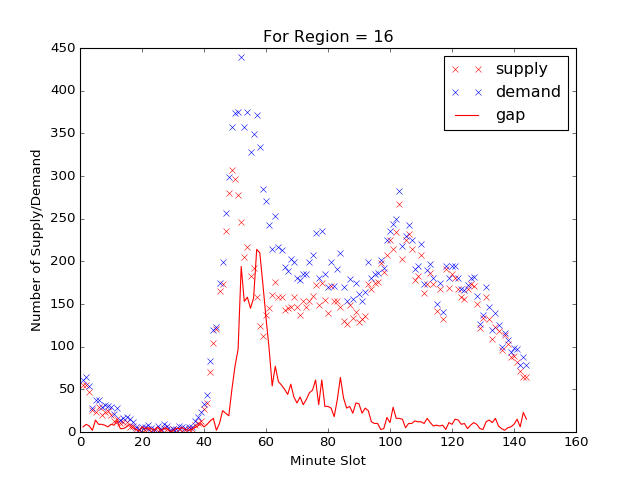

<IPython.core.display.Javascript object>


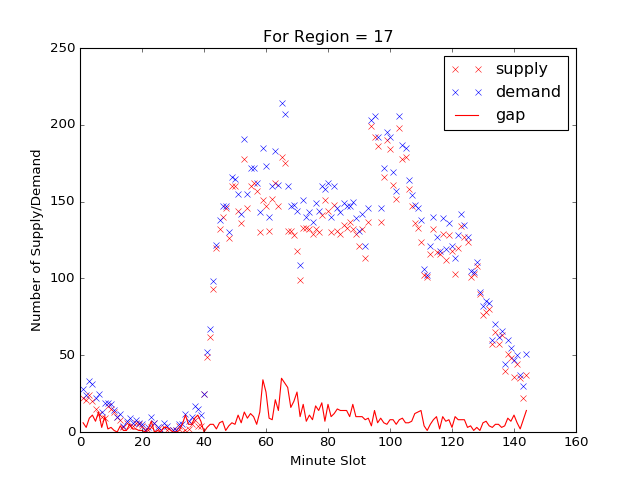

<IPython.core.display.Javascript object>


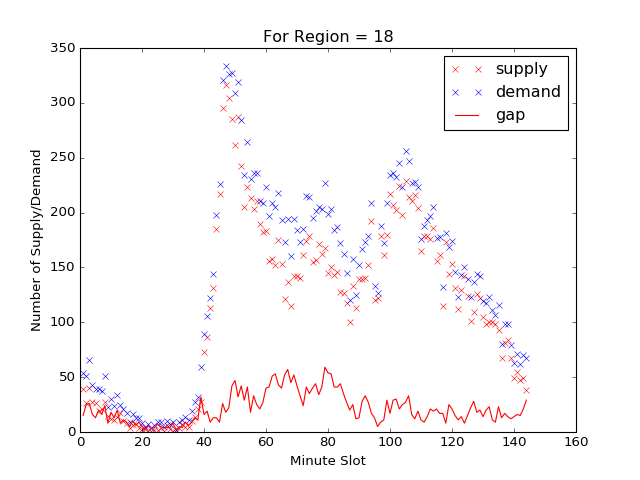

<IPython.core.display.Javascript object>


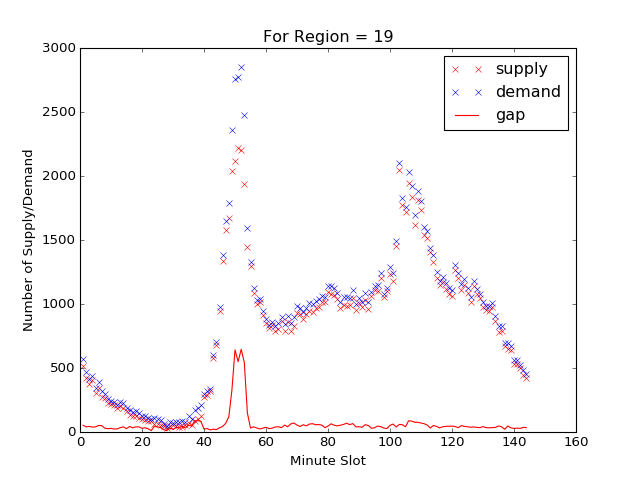

<IPython.core.display.Javascript object>


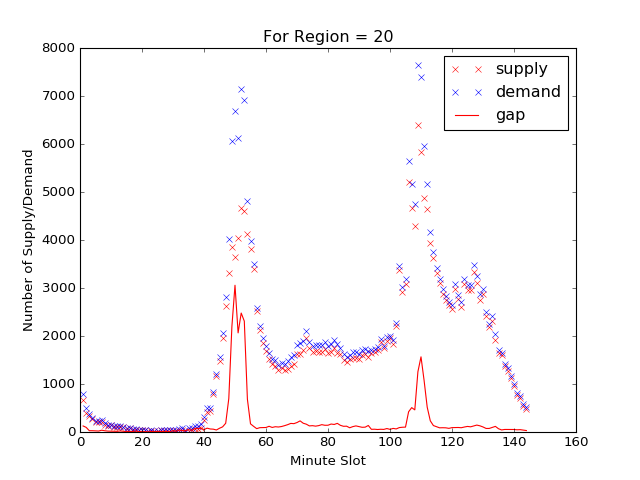

/home/muneebaadil/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


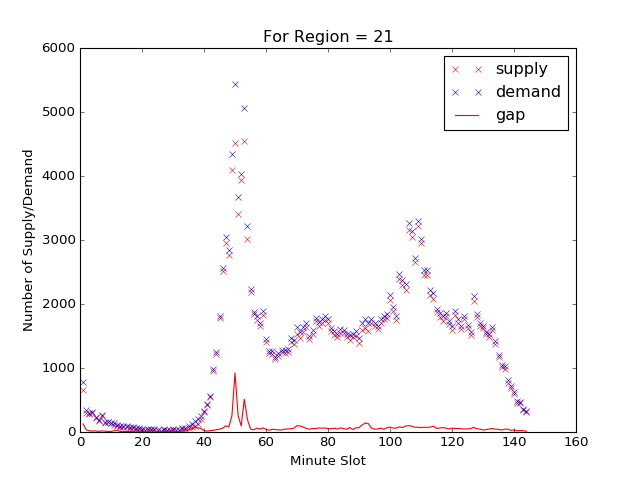

<IPython.core.display.Javascript object>


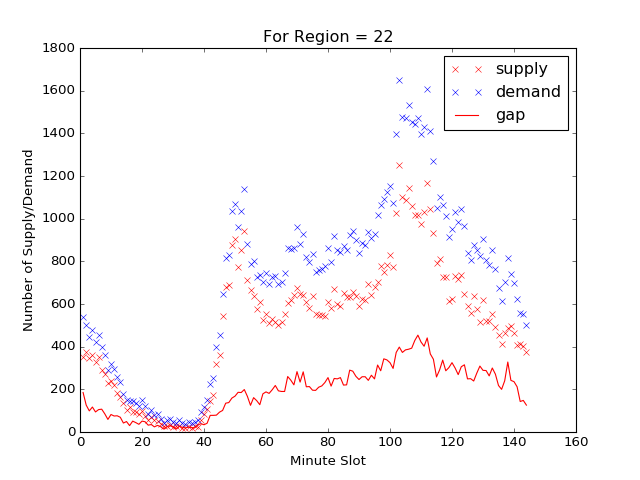

<IPython.core.display.Javascript object>


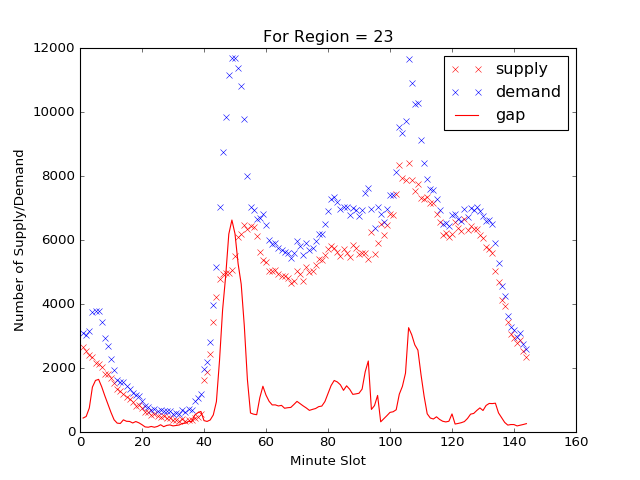

<IPython.core.display.Javascript object>


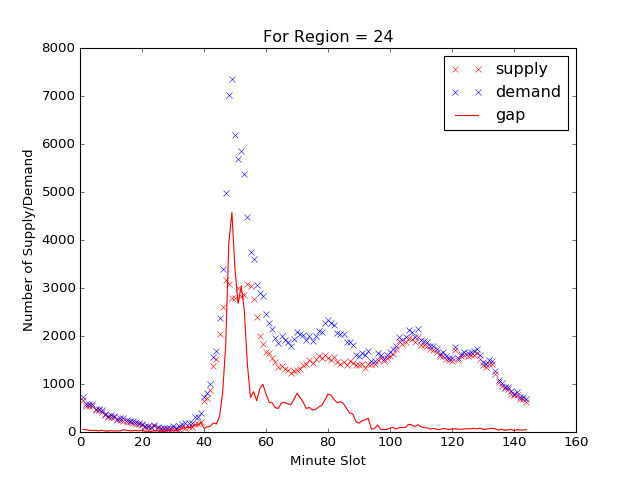

<IPython.core.display.Javascript object>


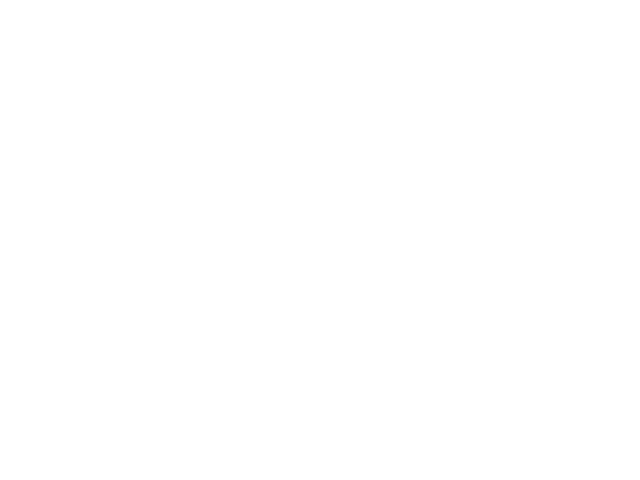

<IPython.core.display.Javascript object>


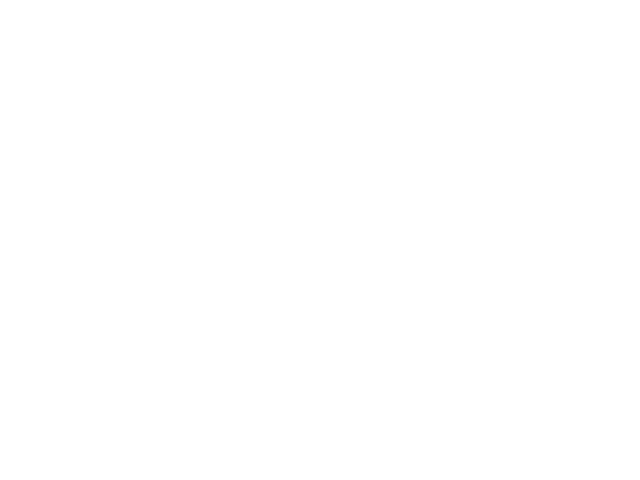

<IPython.core.display.Javascript object>


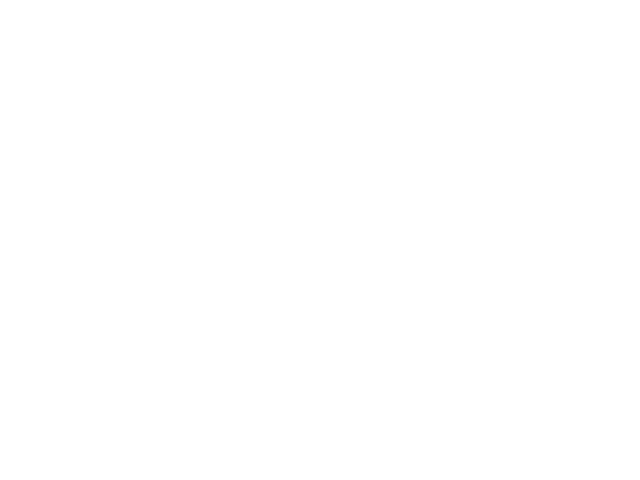

<IPython.core.display.Javascript object>


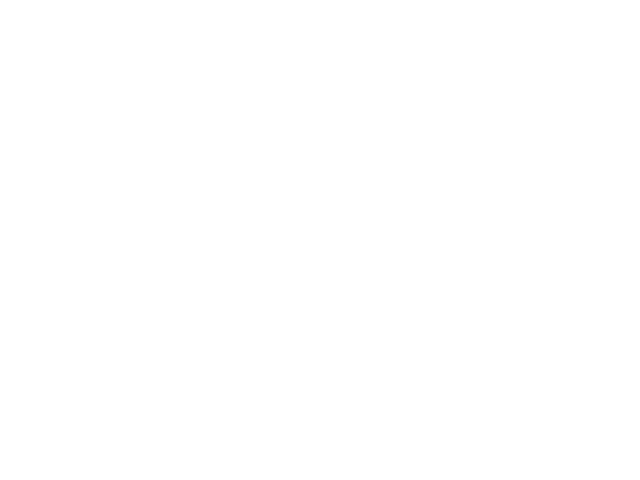

<IPython.core.display.Javascript object>


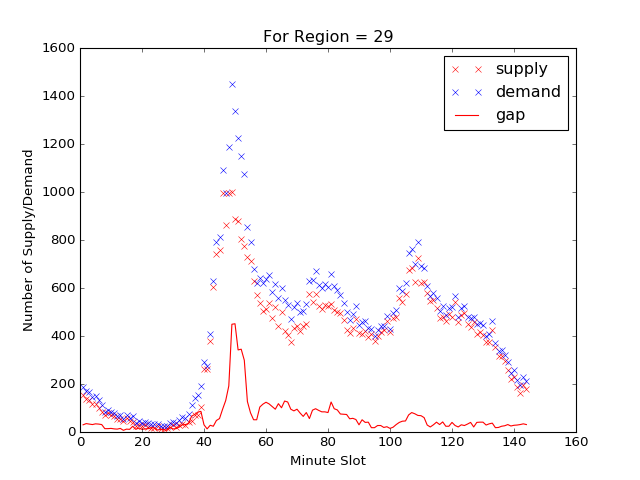

<IPython.core.display.Javascript object>


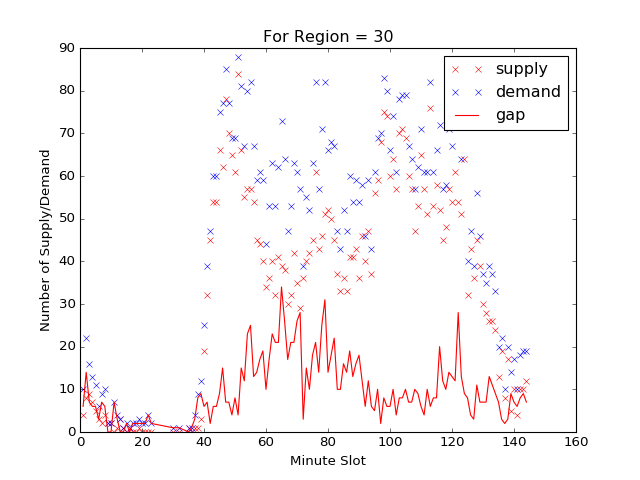

<IPython.core.display.Javascript object>


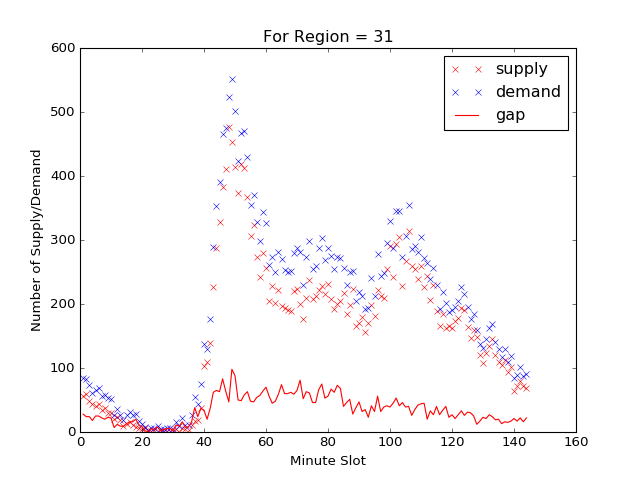

<IPython.core.display.Javascript object>


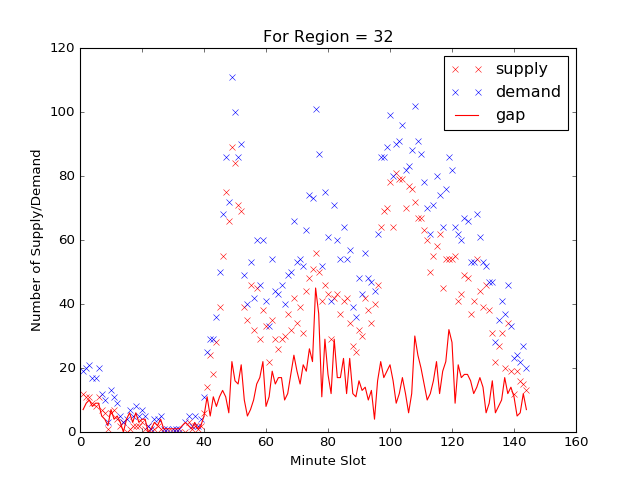

<IPython.core.display.Javascript object>


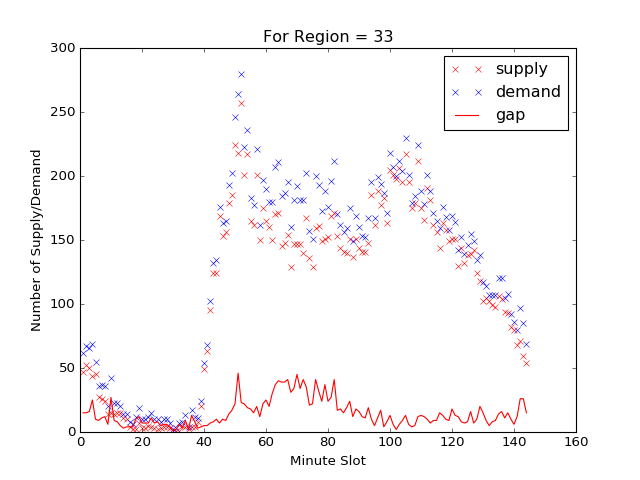

<IPython.core.display.Javascript object>


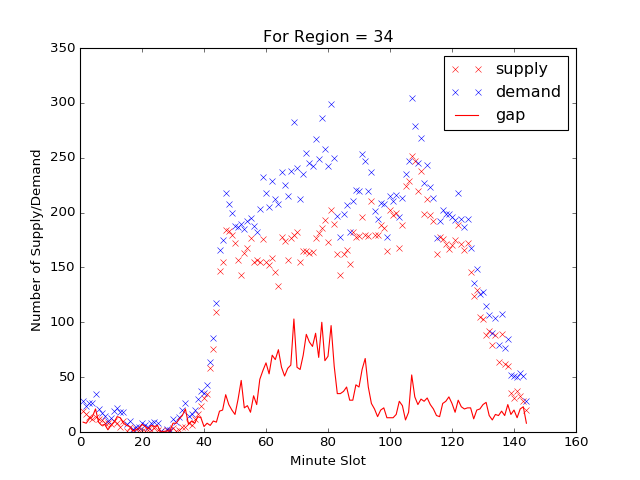

<IPython.core.display.Javascript object>


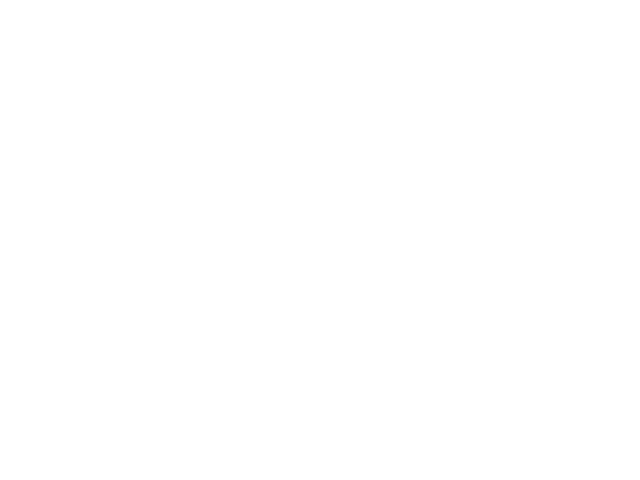

<IPython.core.display.Javascript object>


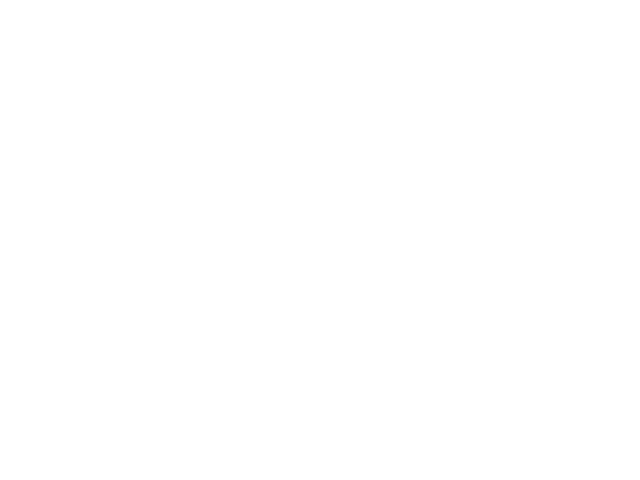

<IPython.core.display.Javascript object>


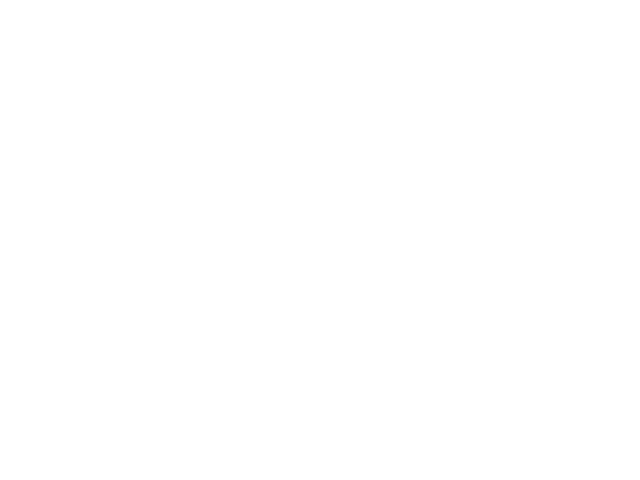

<IPython.core.display.Javascript object>


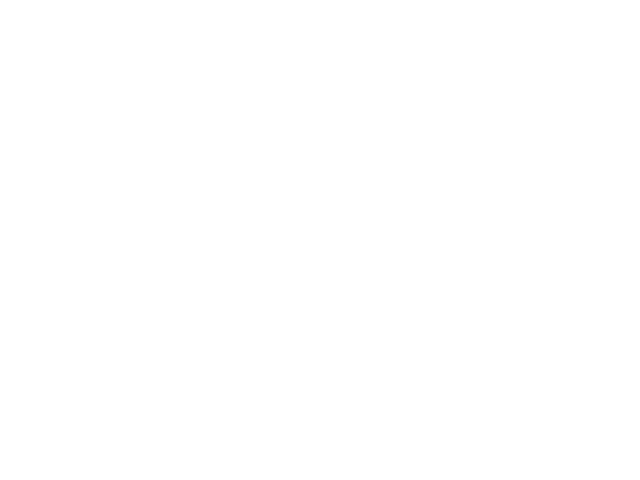

<IPython.core.display.Javascript object>


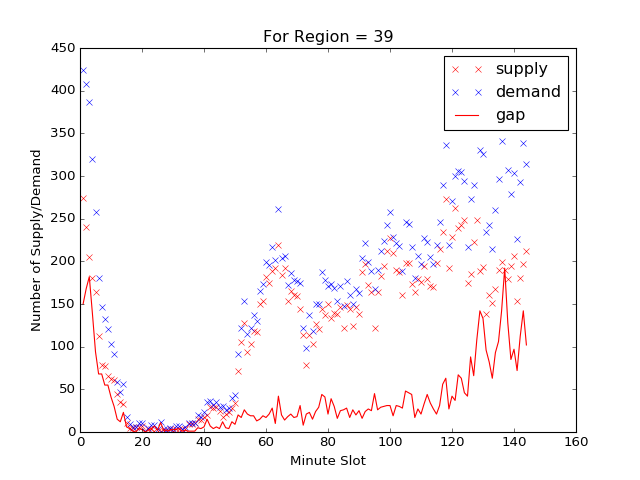

<IPython.core.display.Javascript object>


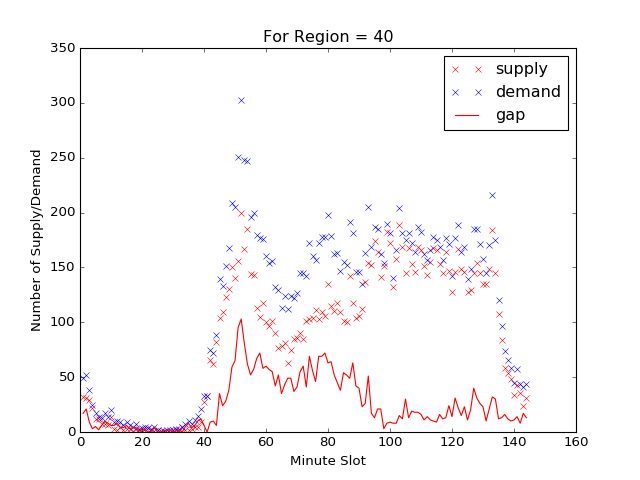

<IPython.core.display.Javascript object>


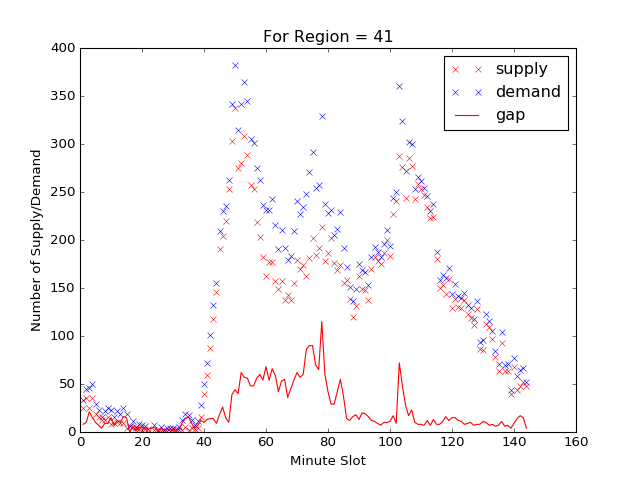

<IPython.core.display.Javascript object>


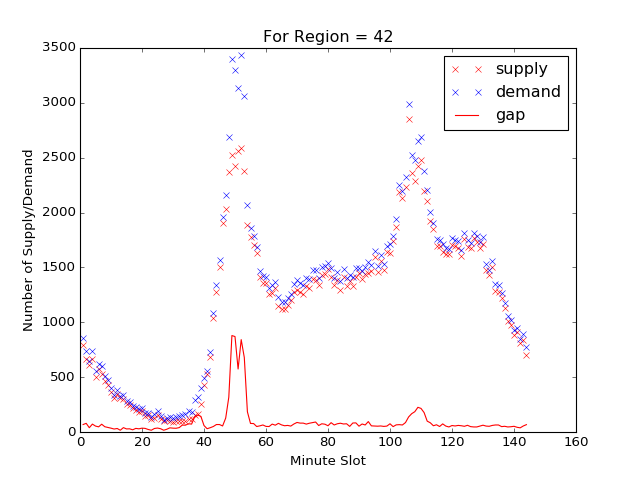

<IPython.core.display.Javascript object>


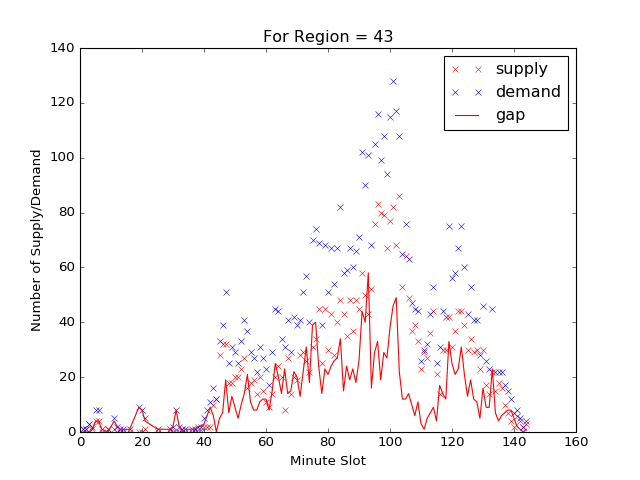

<IPython.core.display.Javascript object>


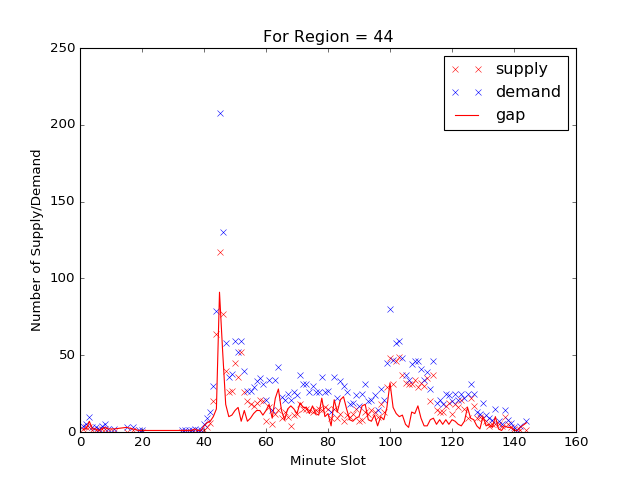

<IPython.core.display.Javascript object>


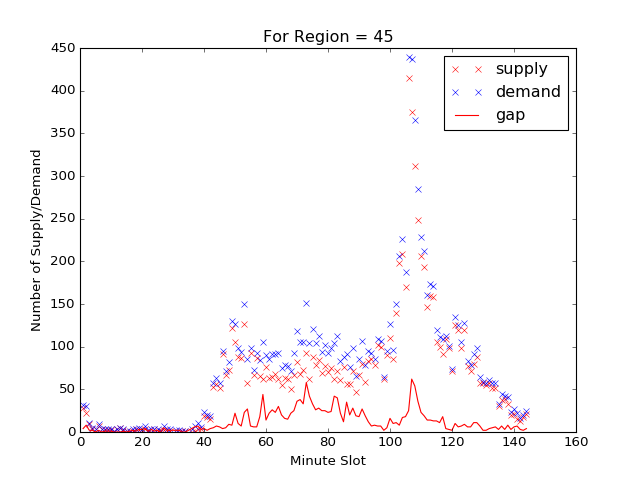

<IPython.core.display.Javascript object>


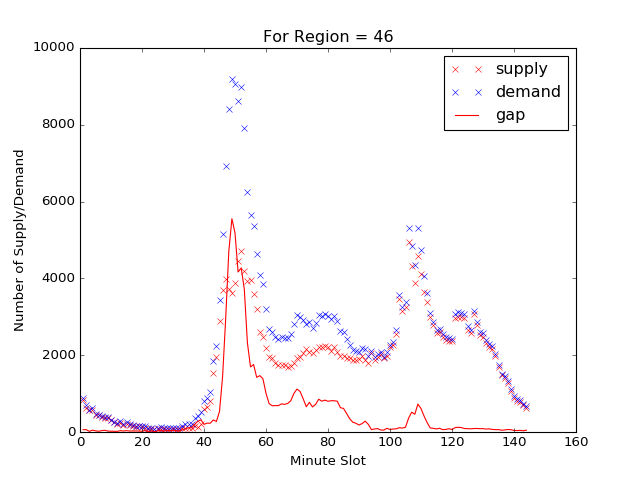

<IPython.core.display.Javascript object>


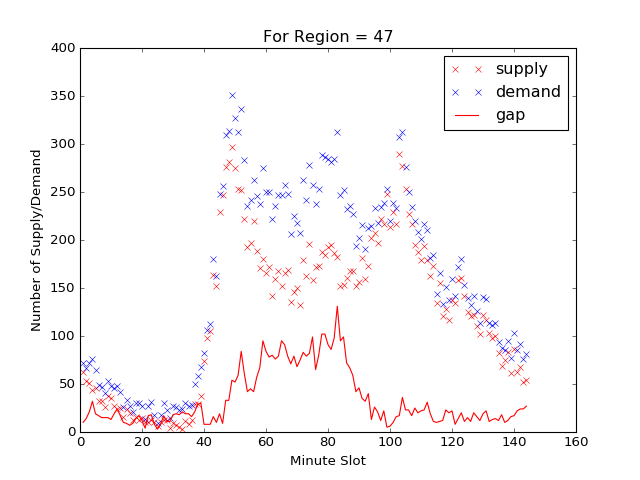

<IPython.core.display.Javascript object>


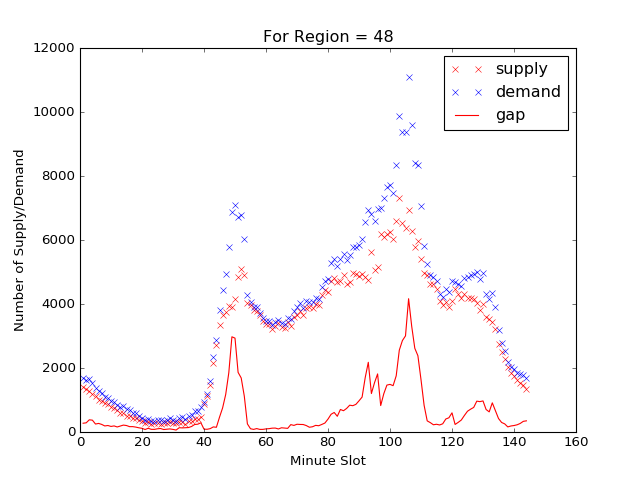

<IPython.core.display.Javascript object>


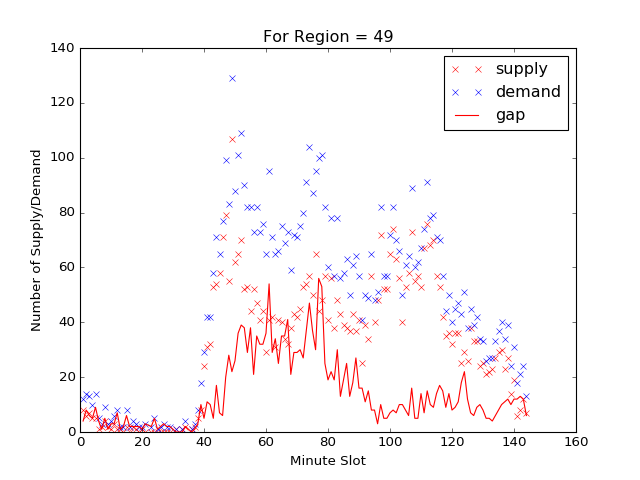

<IPython.core.display.Javascript object>


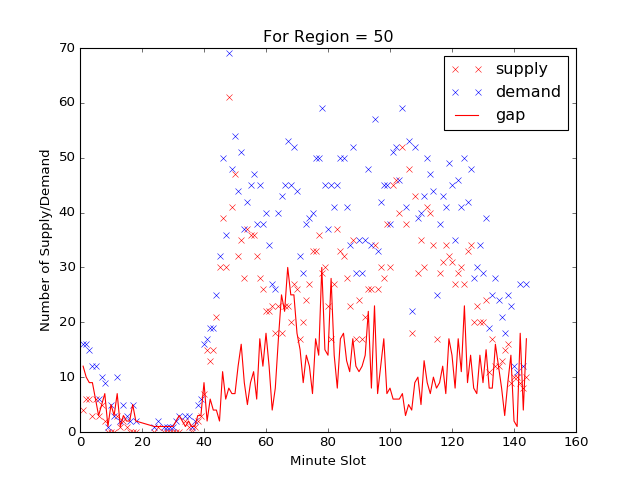

<IPython.core.display.Javascript object>


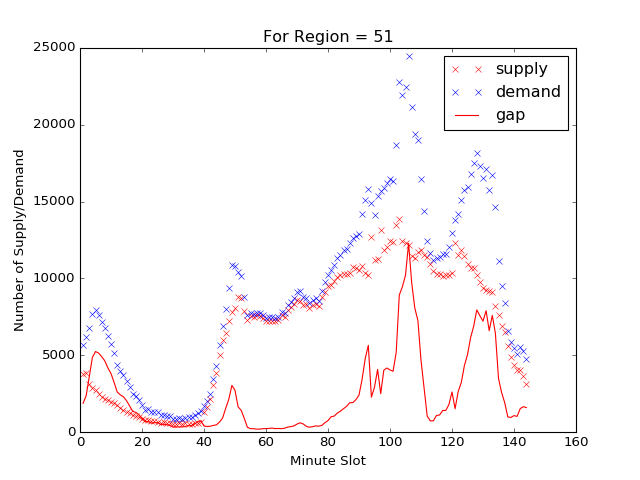

<IPython.core.display.Javascript object>


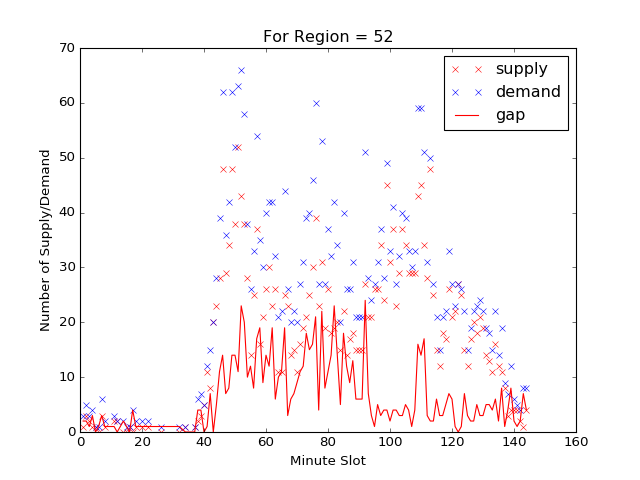

<IPython.core.display.Javascript object>


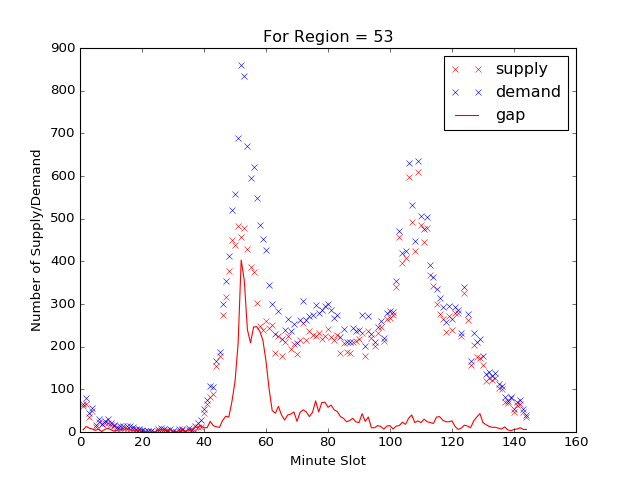

<IPython.core.display.Javascript object>


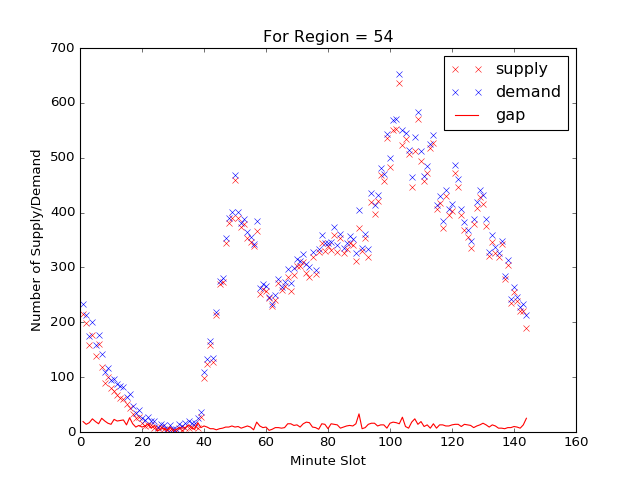

<IPython.core.display.Javascript object>


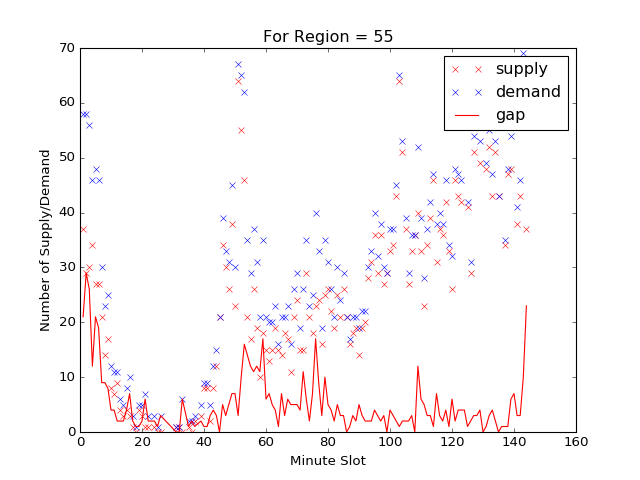

<IPython.core.display.Javascript object>


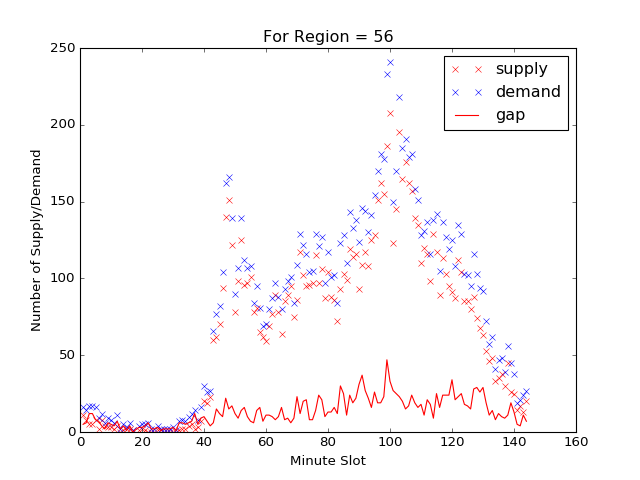

<IPython.core.display.Javascript object>


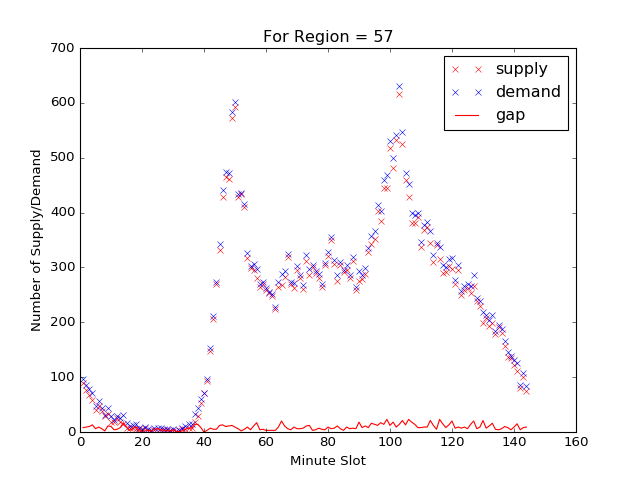

<IPython.core.display.Javascript object>


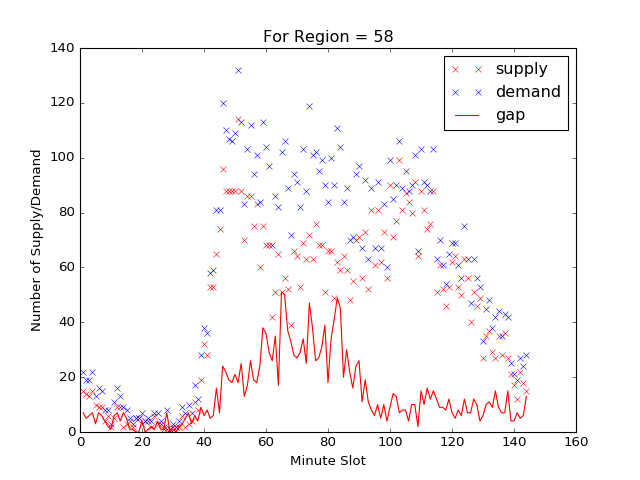

<IPython.core.display.Javascript object>


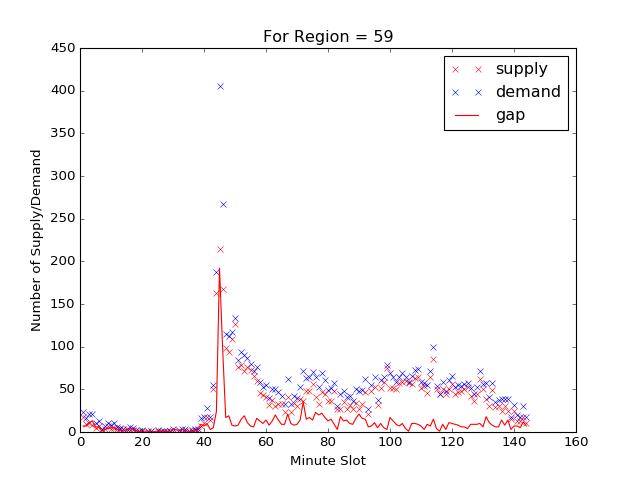

<IPython.core.display.Javascript object>


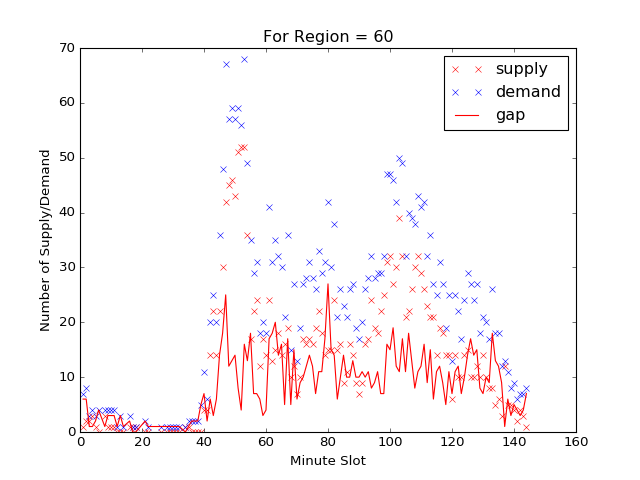

<IPython.core.display.Javascript object>


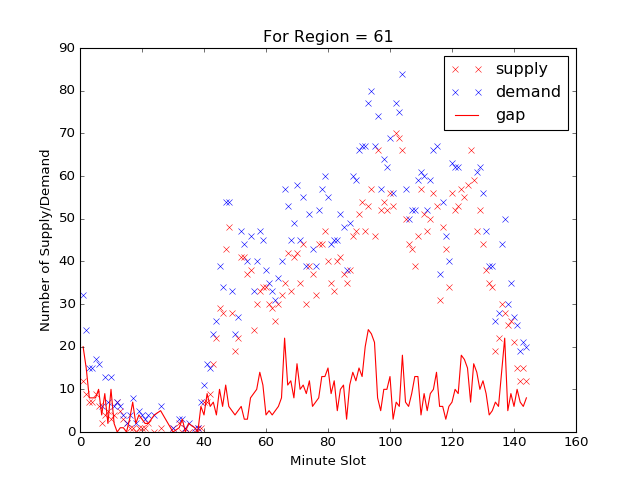

<IPython.core.display.Javascript object>


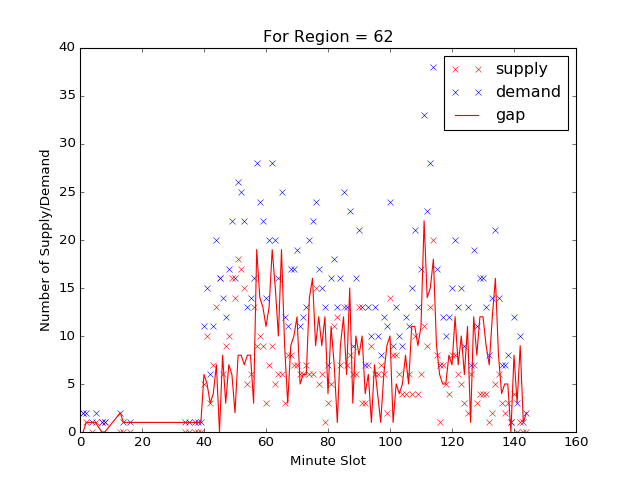

<IPython.core.display.Javascript object>


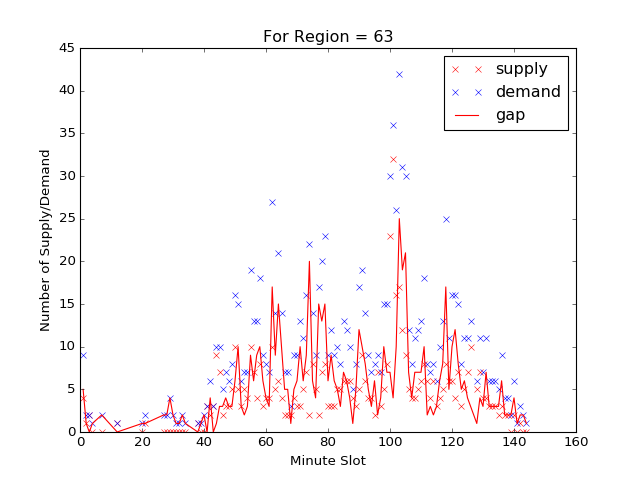

<IPython.core.display.Javascript object>


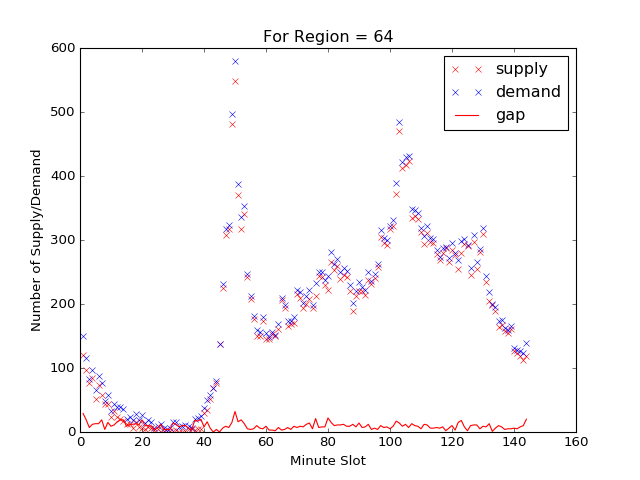

<IPython.core.display.Javascript object>


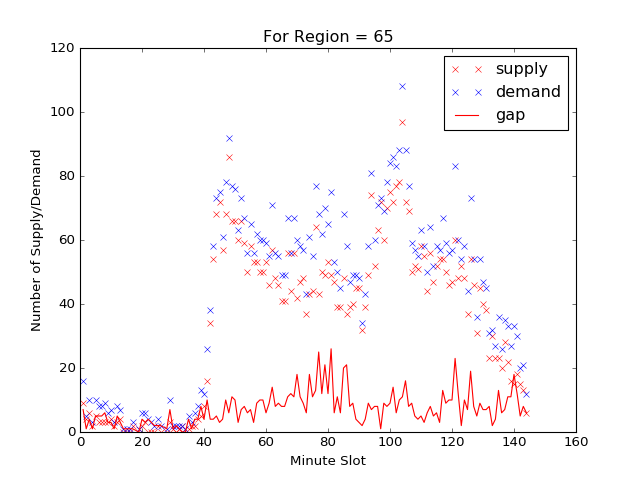

<IPython.core.display.Javascript object>


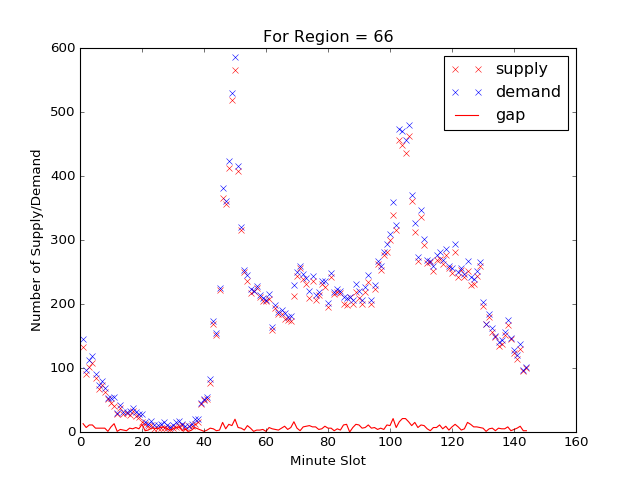

In [6]:
#fig, axs=plt.subplots(nrows=11, ncols=6,)
def PlotRegions(X, supply, demand, colors=['r','b','k']):
    for r in regions: 
        idx=r-1
        fig, axs=plt.subplots()
        axs.plot(X[X[:,0]==r, 1], supply[X[:,0]==r], colors[0]+'x', label='supply')
        axs.plot(X[X[:,0]==r, 1], demand[X[:,0]==r], colors[1]+'x', label='demand')
        axs.plot(X[X[:,0]==r, 1], demand[X[:,0]==r]-supply[X[:,0]==r], colors[2]+'-', label='gap')
        plt.xlabel('Minute Slot')
        plt.ylabel('Number of Supply/Demand')
        plt.title('For Region = {}'.format(r))
        plt.legend()
PlotRegions(X, supply, demand)

<IPython.core.display.Javascript object>


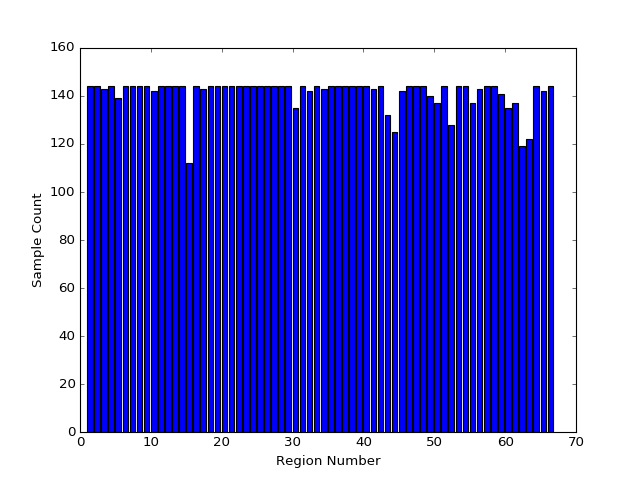

In [7]:
def PlotRegionCounts(X, ax):
    regioncounts = np.zeros((numregions,))
    for r in regions:
        regioncounts[r-1] = np.sum(X[:, 0]==(r))
    ax.bar(regions, regioncounts)
    ax.set_xlabel('Region Number')
    ax.set_ylabel('Sample Count')
fig, ax = plt.subplots()
PlotRegionCounts(X, ax)

In [8]:
def SplitByRegion(X, supply, demand, splitfrac):
    Xtrain, supplyTrain, demandTrain = None, None, None
    Xval, supplyVal, demandVal = None, None, None
    
    for r in regions:
        Xr, supplyr, demandr = X[X[:, 0]==r], supply[X[:, 0]==r], demand[X[:, 0]==r]
        randidx = np.random.choice(Xr.shape[0], (Xr.shape[0],), replace=False)
        cut = int(Xr.shape[0]*splitfrac)
        
        if Xtrain is None: 
            Xtrain, supplyTrain, demandTrain = Xr[randidx[:cut]], supplyr[randidx[:cut]], demandr[randidx[:cut]]
            Xval, supplyVal, demandVal = Xr[randidx[cut:]], supplyr[randidx[cut:]], demandr[randidx[cut:]]
        else:
            Xrtrain, supplyrTrain, demandrTrain = Xr[randidx[:cut]], supplyr[randidx[:cut]], demandr[randidx[:cut]]
            Xrval, supplyrVal, demandrVal = Xr[randidx[cut:]], supplyr[randidx[cut:]], demandr[randidx[cut:]]
            
            Xtrain = np.concatenate((Xtrain, Xrtrain))
            supplyTrain = np.concatenate((supplyTrain, supplyrTrain))
            demandTrain = np.concatenate((demandTrain, demandrTrain))
            
            Xval = np.concatenate((Xval, Xrval))
            supplyVal = np.concatenate((supplyVal, supplyrVal))
            demandVal = np.concatenate((demandVal, demandrVal))
    return Xtrain, supplyTrain, demandTrain, Xval, supplyVal, demandVal

In [9]:
Xtrain, supplyTrain, demandTrain, Xval, supplyVal, demandVal = SplitByRegion(X, supply, demand, .7)

<IPython.core.display.Javascript object>


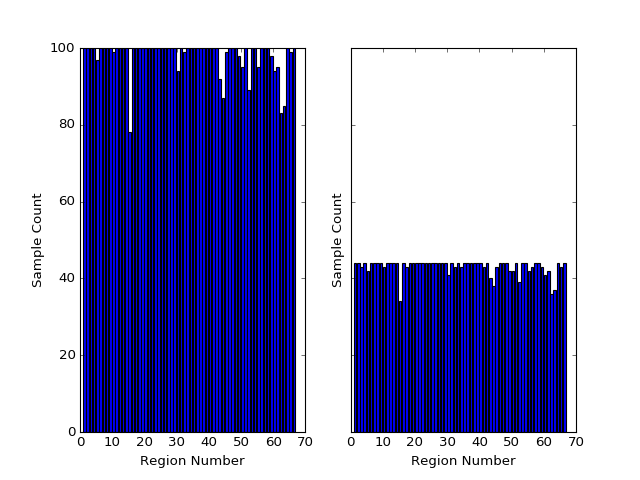

In [10]:
fig, ax = plt.subplots(ncols=2, sharey=True)
PlotRegionCounts(Xtrain, ax[0])
PlotRegionCounts(Xval, ax[1])

In [11]:
def getMAE(truths, preds): 
    return np.mean(np.abs(truths-preds))

In [23]:
def trainModel(Xtrain, Ytrain, Xval, Yval, verbose=False):
    """
    Trains a best polynomial regression model (by cross-validating hyperparameters) 
    
    Args: 
    Xtrain (m x n), Ytrain (m), Xval (m' x n), Yval (m')
    
    Returns:
    bestmodel: Best classifier model's object
    minscoredeg: Degree to transform input feature vector by, for test time. 
    """
    degs = np.arange(1, 20)
    minyet = np.inf
    bestmodel = None
    minscoredeg = None
    for d in degs: 
        alphas = np.arange(0, 5, .2)
        
        for alpha in alphas:   
            polymodel = PolynomialFeatures(degree=d)
            Xtrainnew = polymodel.fit_transform(Xtrain)
            
            model = linear_model.Ridge(alpha=alpha)
            model.fit(Xtrainnew, Ytrain)
            
            predval = model.predict(polymodel.fit_transform(Xval))
            score = getMAE(Yval, predval)
            
            if verbose==True:
                print 'degree = {}'.format(d), '\talpha = {}'.format(alpha), '\t score = {}'.format(score)
            
            if (score < minyet):
                minyet = score  
                bestmodel = model
                minscoredeg = d
    return bestmodel, minscoredeg

In [47]:
def trainRegion(Xtrainr, supplyTrainr, demandTrainr, Xvalr, supplyValr, demandValr, verbose=False):
    """For a region, trains two polynomial regressors (one for demand, one for supply)"""
    #Step I: Training a regression model for DEMAND
    bestmodel, minscoredeg = trainModel(Xtrainr[:, np.newaxis], demandTrainr,
                                                  Xvalr[:, np.newaxis], demandValr, verbose)
    
    #Step II: Training a regression model for SUPPLY
    demandtrainpreds = bestmodel.predict(PolynomialFeatures(degree=minscoredeg).fit_transform(Xtrainr[:, np.newaxis]))
    demandvalpreds = bestmodel.predict(PolynomialFeatures(degree=minscoredeg).fit_transform(Xvalr[:, np.newaxis]))
    
    Xtrainrnew = Xtrainr[:, np.newaxis] #np.concatenate((Xtrainr[:, np.newaxis], demandtrainpreds[:, np.newaxis]), axis=1)
    Xvalrnew = Xvalr[:, np.newaxis] #np.concatenate((Xvalr[:, np.newaxis], demandvalpreds[:, np.newaxis]), axis=1)
    
    bestmodel2, minscoredeg2 = trainModel(Xtrainrnew, supplyTrainr, Xvalrnew, supplyValr)
    return bestmodel, minscoredeg, bestmodel2, minscoredeg2

In [59]:
regionmodels = []
regionerrors = np.zeros((numregions,))
#print 'training model for region =',
for i, r in enumerate(regions): 
    #print str(r)+',',
    Xtrainr, supplyTrainr, demandTrainr = Xtrain[Xtrain[:, 0]==r, 1], \
                                            supplyTrain[Xtrain[:, 0]==r], demandTrain[Xtrain[:, 0]==r]
    Xvalr, supplyValr, demandValr = Xval[Xval[:,0]==r, 1], supplyVal[Xval[:,0]==r], demandVal[Xval[:,0]==r]
    
    demandmodel, demanddeg, supplymodel, supplydeg = trainRegion(Xtrainr, supplyTrainr, demandTrainr, 
                                                Xvalr, supplyValr, demandValr, verbose=False)
    #regionmodels.append((minscoredeg, regionmodel))
    
    #fig, ax = plt.subplots()
    #ax.plot(Xtrainr, demandTrainr, 'rx', label='demand')
    #ax.plot(Xtrainr, supplyTrainr, 'bx', label='supply')
    #ax.plot(Xtrainr, demandTrainr-supplyTrainr, 'kx', label='gap')
    
    demandpreds = demandmodel.predict(PolynomialFeatures(degree=demanddeg).fit_transform(Xvalr[:, np.newaxis]))

    Xvalrnew = Xvalr[:, np.newaxis] #np.concatenate((Xtrainr[:, np.newaxis], demandpreds[:, np.newaxis]), axis=1)
    supplypreds = supplymodel.predict(PolynomialFeatures(degree=supplydeg).fit_transform(Xvalrnew))
    
    #pdb.set_trace()
    #ax.plot(Xvalr, demandValr-supplyValr, 'rx')
    #ax.plot(Xvalr, demandpreds-supplypreds, 'bx')
    #ax.plot(Xvalr, demandValr,'r*')
    #ax.plot(Xvalr, demandValr-supplyValr, 'mx', )
    print 'Region {}, Error = {}'.format(r, getMAE(demandValr-supplyValr, demandpreds-supplypreds))
    regionerrors[i] = getMAE(demandValr-supplyValr, demandpreds-supplypreds)

Region 1, Error = 63.5461634142
Region 2, Error = 4.74184353387
Region 3, Error = 5.30922041513
Region 4, Error = 155.419460934
Region 5, Error = 7.68969758136
Region 6, Error = 47.9665649141
Region 7, Error = 429.533210282
Region 8, Error = 802.920554112
Region 9, Error = 19.4780576717
Region 10, Error = 7.89752472032
Region 11, Error = 10.8477140315
Region 12, Error = 33.5172654769
Region 13, Error = 12.3399008081
Region 14, Error = 286.721477649
Region 15, Error = 2.76881952443
Region 16, Error = 11.8645118494
Region 17, Error = 3.75294405331
Region 18, Error = 12.5948226693
Region 19, Error = 44.4627245201
Region 20, Error = 224.386772224
Region 21, Error = 230.969927249
Region 22, Error = 23.7900236363
Region 23, Error = 742.816621714
Region 24, Error = 345.543760193
Region 25, Error = 27.0766386447
Region 26, Error = 100.740989359
Region 27, Error = 29.7710574169
Region 28, Error = 549.367890863
Region 29, Error = 32.682411049
Region 30, Error = 2.65560023774
Region 31, Error = 6

In [60]:
print 'Algo MAE = {}'.format(np.mean(regionerrors))

Algo MAE = 105.843251518


In [69]:
print regionerrors[regionerrors>10]

[   63.54616341   155.41946093    47.96656491   429.53321028   802.92055411
    19.47805767    10.84771403    33.51726548    12.33990081   286.72147765
    11.86451185    12.59482267    44.46272452   224.38677222   230.96992725
    23.79002364   742.81662171   345.54376019    27.07663864   100.74098936
    29.77105742   549.36789086    32.68241105    12.52835054    10.64663081
   389.81768804    24.67392601    15.89545999    15.310334      68.08127459
    15.89668677   393.54723544   383.60534376  1228.69173988    36.58683106]
